In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import geopandas as gpd
import shapely.speedups
shapely.speedups.enable()
from shapely import wkt, wkb
from shapely.geometry import Polygon, Point, LinearRing, MultiPoint, shape
from shapely.ops import nearest_points
from tqdm import tqdm, tqdm_notebook

import sys
sys.path.insert(0, '../helper_functions/')
import wfs_processing as wfs
import get_tables as get

import yaml
with open("../config.yaml", 'r') as config_yml:
    try:
        yml = yaml.load(config_yml)
        for section in yml:
            print('sections in YAML : {}'.format(section))
    except yaml.YAMLError as exc:
        print (exc)

# interactive dropdown
import ipywidgets as widgets
fractie_choice = widgets.Dropdown(options=yml['afvalcontainers']['fracties'], value=None)

sections in YAML : path
sections in YAML : file
sections in YAML : file_stag_tables
sections in YAML : distance_matrix_files
sections in YAML : crs
sections in YAML : afvalcontainers
sections in YAML : dbscan_afvalcontainers
sections in YAML : dbscan_vot
sections in YAML : normen


In [45]:
import importlib
importlib.reload(get)

<module 'get_tables' from '../helper_functions/get_tables.py'>

In [27]:
print ('Choice your fractie')
fractie_choice

Choice your fractie


Dropdown(options=('Rest', 'Papier', 'Glas', 'Plastic', 'Textiel'), value=None)

In [46]:
fractie = fractie_choice.value 
buffer = yml['normen'][fractie]['kritiek_start']
bovengrens = yml['normen'][fractie]['bovengrens'] # value not according to distance norm

print ('fractie: {}'.format(fractie))
print ('buffer: {}'.format(buffer))
print ('bovengrens: {}'.format(bovengrens))

fractie: Rest
buffer: 200
bovengrens: 201


### layer 1) load distance matrices

In [47]:
df = get.get_distance_matrices(path= yml['path']['distance_matrices'], file=yml['distance_matrix_files']['distance_huur_' + fractie.lower()])
df['fractie'] = fractie

Fri, 14 Sep 2018 15:43:41 INFO     GeoDataFrame has shape: (111346, 9) and crs: {'init': 'epsg:28992'}


### layer 2) load amsterdam district polygons

you can also choice buurten `get_buurt_layer` en buurtcombinaties `get_bc_layer`

In [44]:
std = wfs.get_sd_layer()

Fri, 14 Sep 2018 15:41:24 INFO     Requesting data from https://map.data.amsterdam.nl/maps/gebieden, layer: stadsdeel
Fri, 14 Sep 2018 15:41:25 INFO     8 features returned.


### layer 3) tile.stamen background

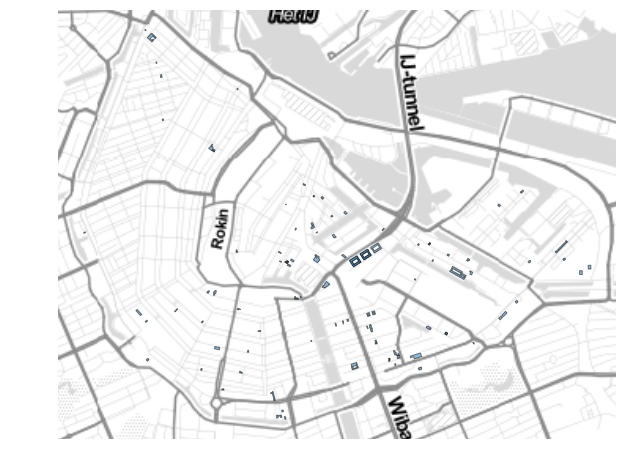

In [61]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
 
ax = df[:100].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=13, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

In [52]:
ctx.sources.ST_TONER_LINES

'http://tile.stamen.com/toner-background/tileZ/tileX/tileY.png'

In [ ]:
custom_bucket_array = np.arange(0,1200, 100)

In [ ]:
cmap=plt.cm.get_cmap('RdYlGn_r', 11)
cmap.set_over('red')

### maps